# **Оригинальный CycleGAN**

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

---

# **horse2zebra**

## Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2516 (delta 0), reused 1 (delta 0), pack-reused 2513
Receiving objects: 100% (2516/2516), 8.20 MiB | 7.54 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [5]:
!pip install -r requirements.txt -qq

## Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [7]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

## Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [10]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2024-07-18 14:17:25--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  7.46MB/s    in 13s     

2024-07-18 14:17:39 (3.24 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



## Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [9]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan --display_id -1

## Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [11]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

## Visualize

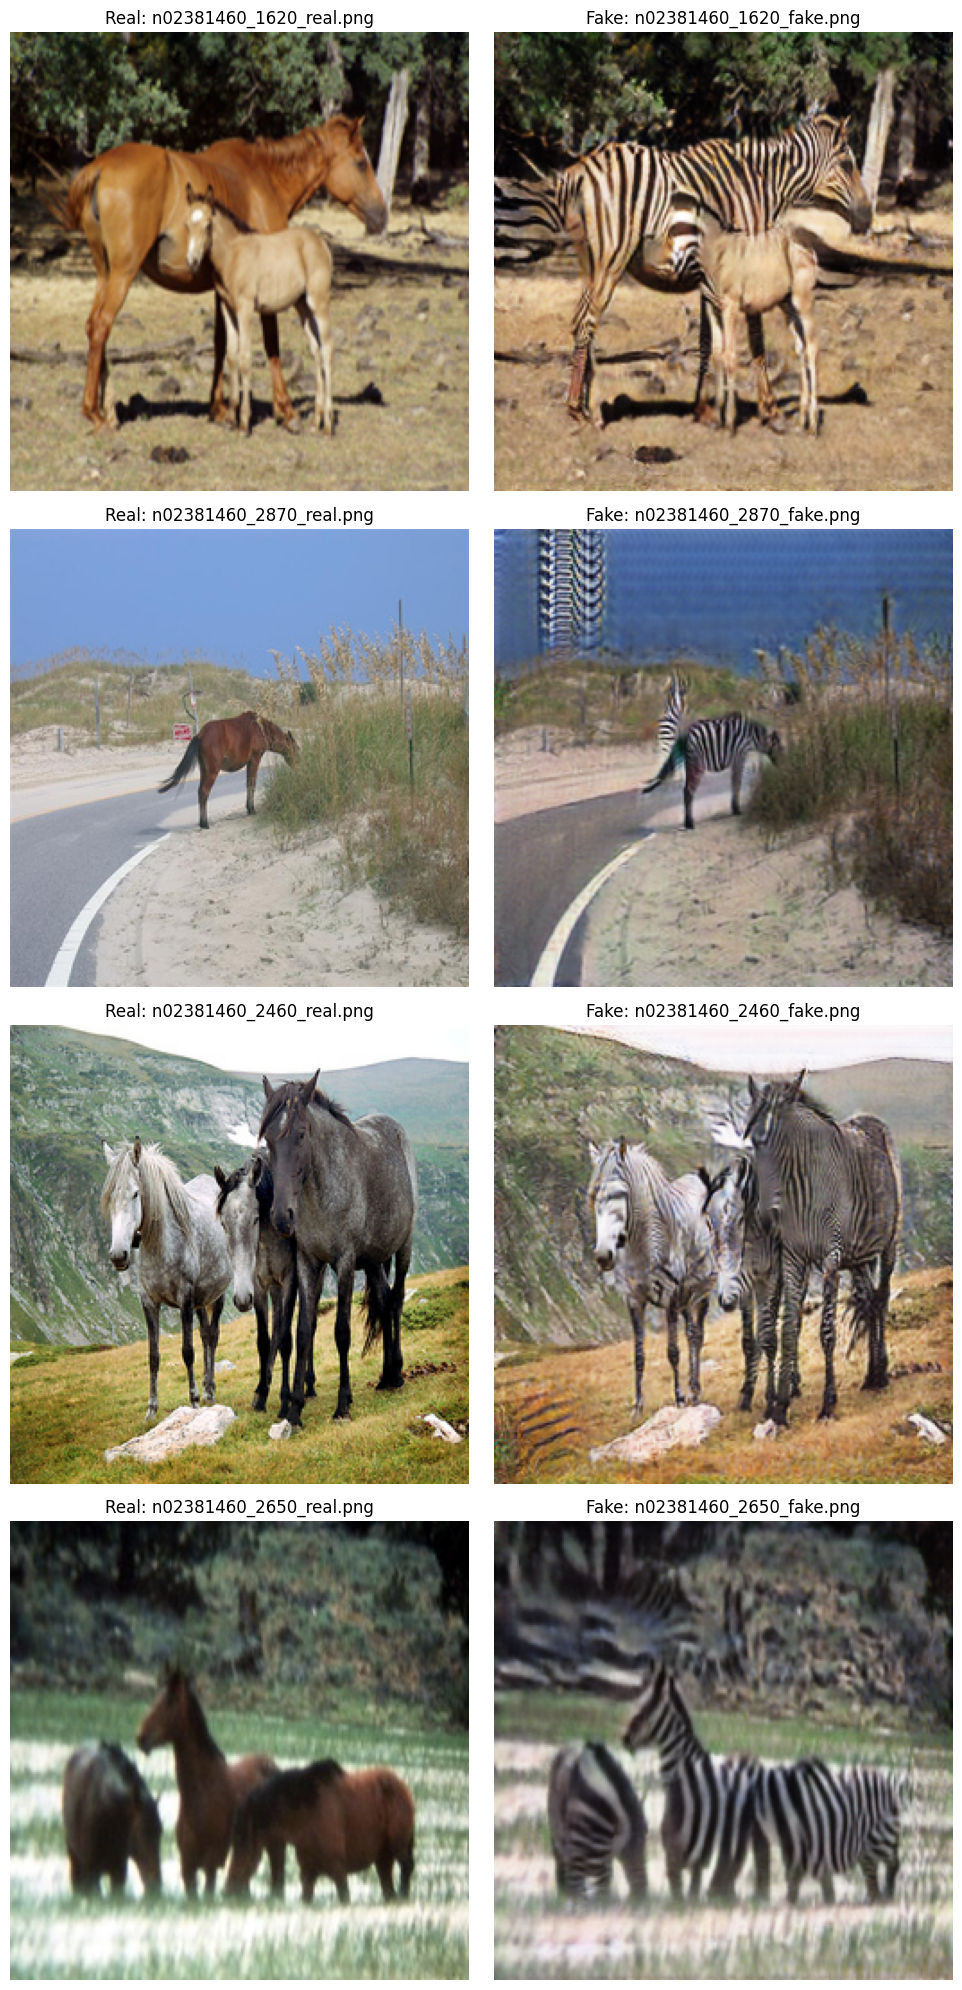

In [28]:
import random
import matplotlib.pyplot as plt

def find_image_pairs(images_path):
    # Получаем список всех файлов в директории
    all_files = os.listdir(images_path)
    image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp')

    # Фильтруем только файлы с допустимыми расширениями изображений
    image_files = [file for file in all_files if file.lower().endswith(image_extensions)]

    real_fake_pairs = []
    for file in image_files:
        if '_real' in file:
            fake_file = file.replace('_real', '_fake')
            if fake_file in image_files:
                real_fake_pairs.append((file, fake_file))

    return real_fake_pairs


def visualize_image_pairs(images_path, n_pairs=4):
    # Находим все пары изображений
    pairs = find_image_pairs(images_path)

    if len(pairs) < n_pairs:
        print(f"Not enough image pairs found. Only {len(pairs)} pairs available.")
        return

    # Выбираем случайные пары изображений
    random_pairs = random.sample(pairs, n_pairs)

    fig, axs = plt.subplots(n_pairs, 2, figsize=(10, n_pairs * 5))

    for i, (real_file, fake_file) in enumerate(random_pairs):
        real_path = os.path.join(images_path, real_file)
        fake_path = os.path.join(images_path, fake_file)

        real_img = plt.imread(real_path)
        fake_img = plt.imread(fake_path)

        axs[i, 0].imshow(real_img)
        axs[i, 0].axis('off')
        axs[i, 0].set_title(f'Real: {real_file}')

        axs[i, 1].imshow(fake_img)
        axs[i, 1].axis('off')
        axs[i, 1].set_title(f'Fake: {fake_file}')

    plt.tight_layout()
    plt.show()

# Пример использования
images_path = './results/horse2zebra_pretrained/test_latest/images'
visualize_image_pairs(images_path)

---

# **zebra2horse**

In [35]:
!bash ./scripts/download_cyclegan_model.sh zebra2horse

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [zebra2horse]
for details.

--2024-07-18 15:02:18--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/zebra2horse.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/zebra2horse_pretrained/latest_net_G.pth’

./checkpoints/zebra 100%[===================>]  43.46M  11.8MB/s    in 4.9s    

2024-07-18 15:02:24 (8.84 MB/s) - ‘./checkpoints/zebra2horse_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [40]:
!python test.py --dataroot datasets/horse2zebra/testB --name zebra2horse_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testB    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

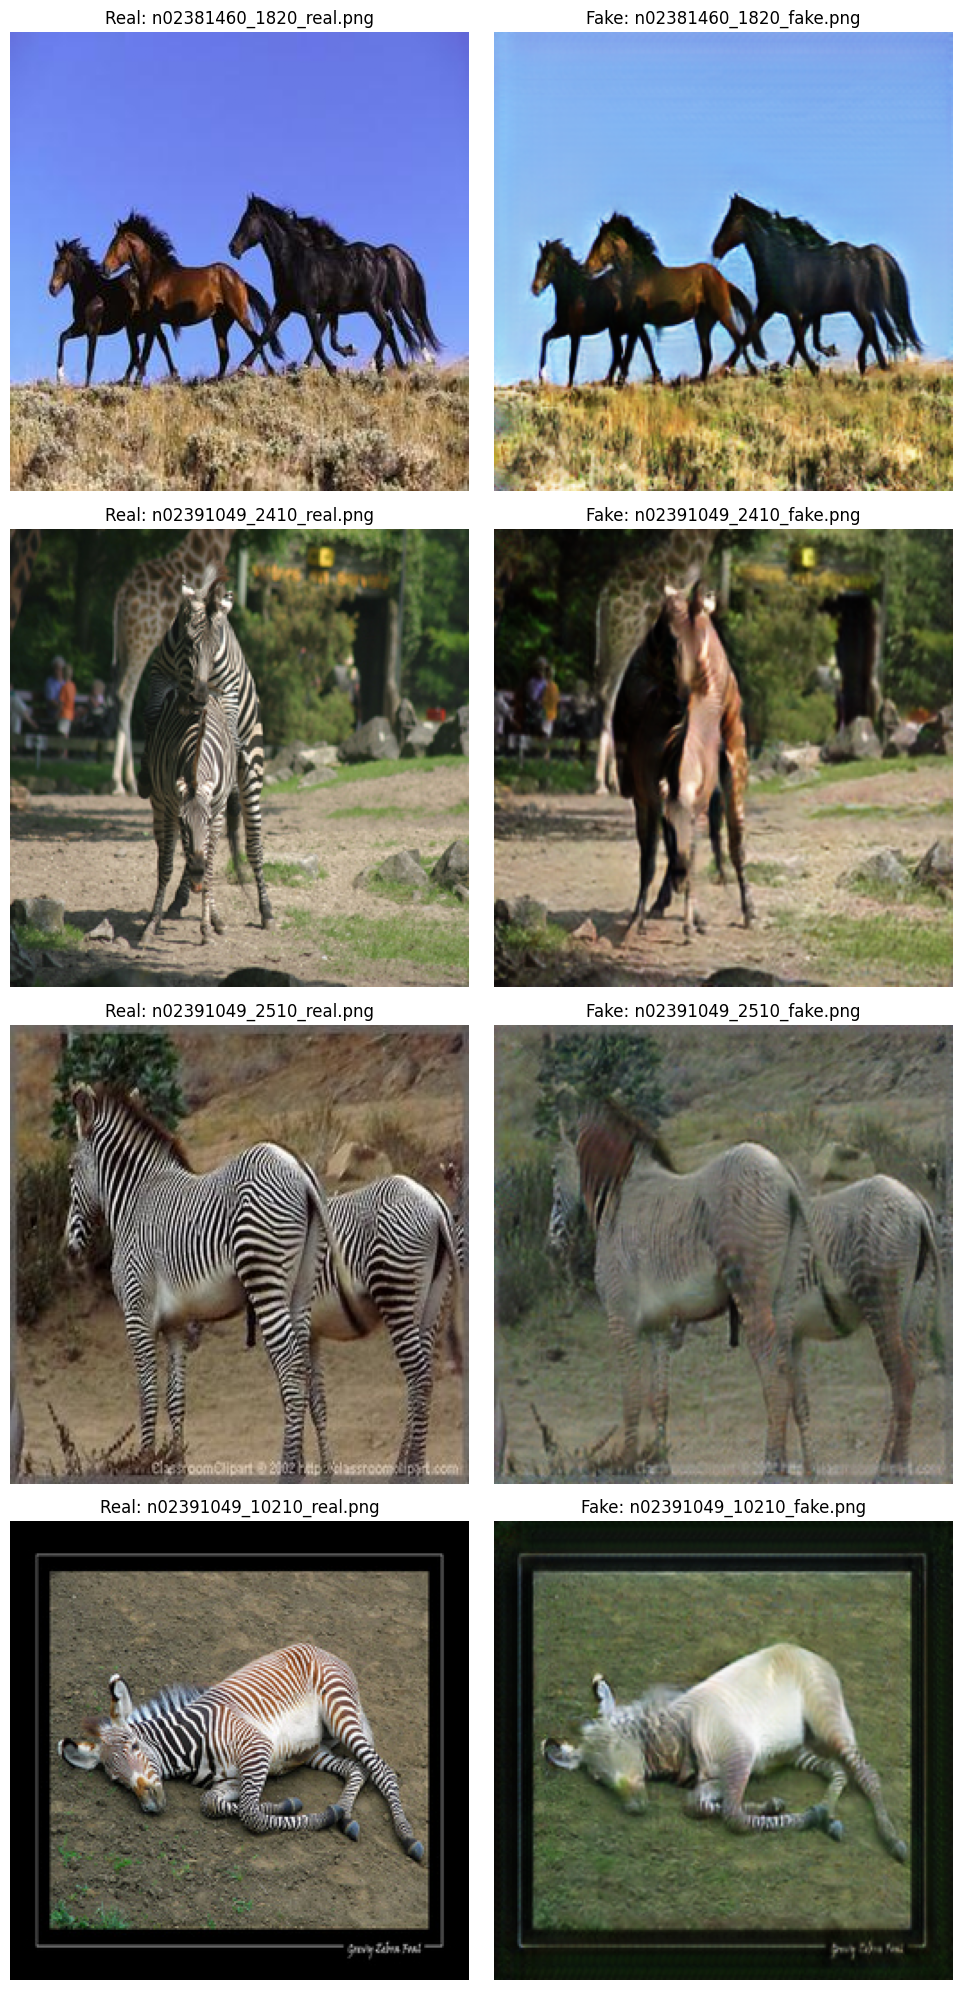

In [42]:
# Пример использования
images_path = './results/zebra2horse_pretrained/test_latest/images'
visualize_image_pairs(images_path)